 **Business Understanding**

 - ***Business Problem:***
  Predict whether a customer will stop doing business with SyriaTel, a telecommunications company.
 - ***Stakeholder:***
  SyriaTel(Customer Retention Department)
 - ***Stakeholder objective:*** 
  Reduce customer churn by understanding key predictors and implementing targeted retention strategies.


**Dataset:** SyriaTel Customer Churn

# Data Understanding and Preparation

* Importing All required libraries.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pointbiserialr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Modeling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.metrics import precision_score, recall_score, RocCurveDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE



In [2]:
# Loading data
df = pd.read_csv('Kaggle_Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* Data Exploration

In [3]:
# DataFrame shape - (3333,21)
df.shape

(3333, 21)

In [4]:
df.info() # Null Counts and Column Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
# Statistical descriptions of numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Checking duplicated values
# No null values as seen from .info()
df.duplicated().sum()

0

### EDA
* Data Preparation

In [7]:
# Converting categorical columns to numerical values
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].astype(int)

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
# Changing column separator from a space to an underscore
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

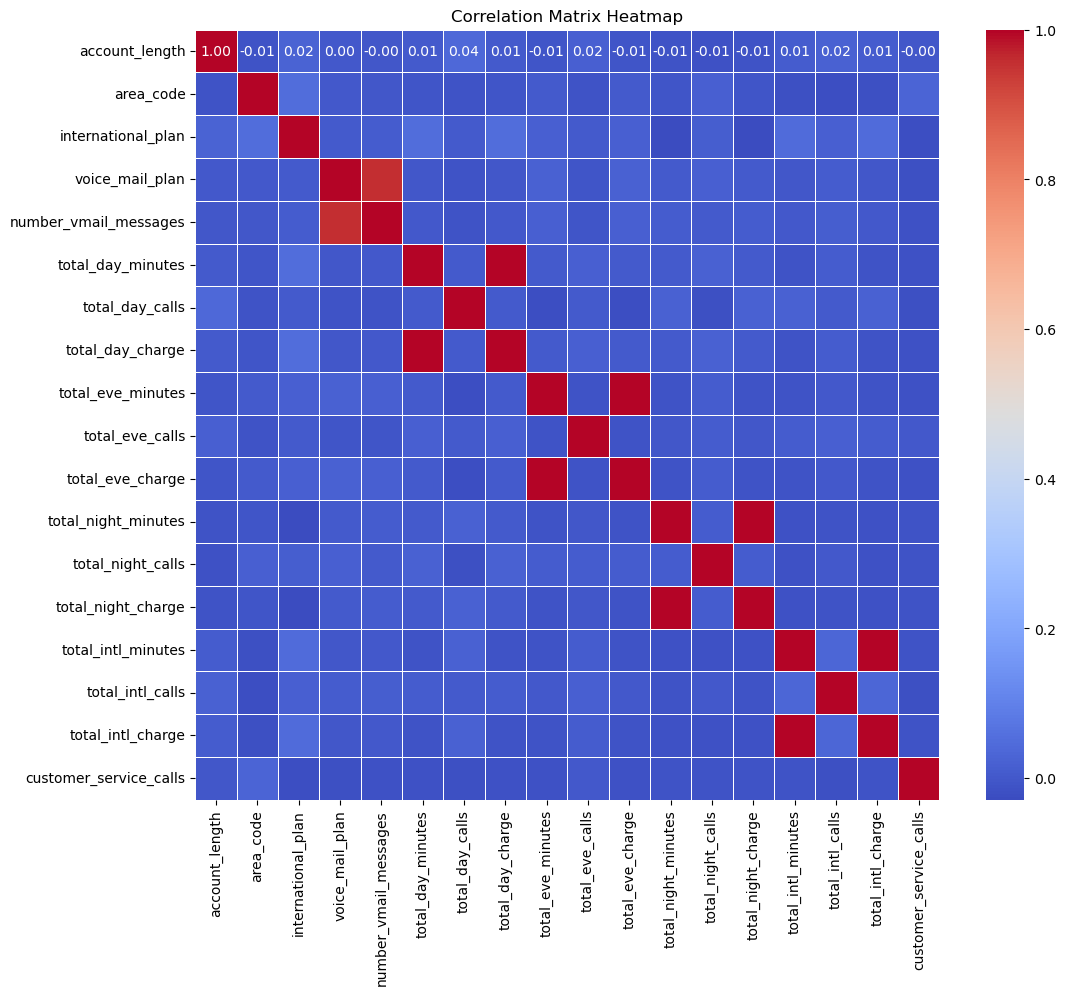

In [9]:
# Numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Observations**
- Voicemail plan and voicemail messages are highly correlated. This is because you need a voicemail plan to receive voicemail messages
- Time of day minutes and time of day charge are highly correlated as your charges are tied to your calls.
- Other features aren't highly correlated.

In [10]:
# Combining time of day minutes and time of day charge columns.
# Creating a function.
def combine(name, *cols):
    "This function will name a new column and add up the columns."
    df[name] = sum(cols)

#Total domestic minutes for each customer.
combine("total_domestic_minutes",
        df["total_day_minutes"],
        df["total_eve_minutes"],
        df["total_night_minutes"])

#Total domestic calls for each customer.
combine("total_domestic_calls",
        df["total_day_calls"],
        df["total_eve_calls"],
        df["total_night_calls"])

#Total domestic charges for each customer.
combine("total_domestic_charge",
        df["total_day_charge"],
        df["total_eve_charge"],
        df["total_night_charge"])

#Total charges for each customer.
combine("total_charge",
        df["total_domestic_charge"],
        df["total_intl_charge"])

In [11]:
# Dropping combined columns.
# Time of day minutes and time of day charge columns also have a high degree of collinearity.

to_drop = ["total_day_minutes","total_eve_minutes","total_night_minutes",
           "total_day_calls","total_eve_calls","total_night_calls",
           "total_day_charge","total_eve_charge","total_night_charge",
          "total_domestic_charge","total_intl_charge",
          "phone_number"] # Including phone number as it is an identifier and can't be used in prediction analysis.
df = df.drop(to_drop, axis=1)

In [12]:
# Checking number of unique values to determine categorical and continuous features.
df.nunique()

state                       51
account_length             212
area_code                    3
international_plan           2
voice_mail_plan              2
number_vmail_messages       46
total_intl_minutes         162
total_intl_calls            21
customer_service_calls      10
churn                        2
total_domestic_minutes    2395
total_domestic_calls       190
total_charge              2678
dtype: int64

In [13]:
# Numeric and Categorical Lists
numeric_cols = ['account_length', 'number_vmail_messages', 'total_intl_minutes',
                'total_intl_calls', 'customer_service_calls','total_domestic_minutes',
                'total_domestic_calls', 'total_charge']
categoric_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'] 

**Analysis on ***'churn'*** our target feature**

churn
0    2850
1     483
Name: count, dtype: int64


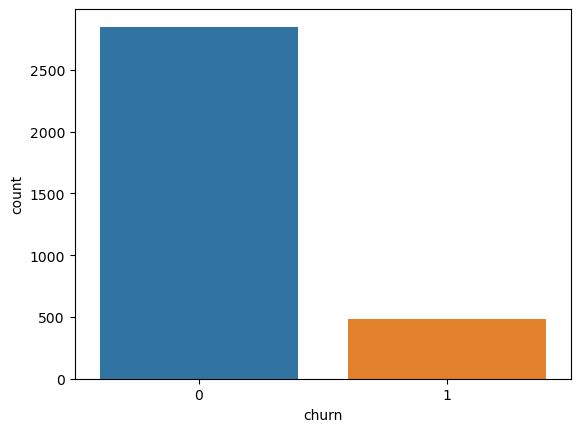

In [14]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

#### Observation.
* The data shows an approx churn rate of 14%

In [15]:
# Numeric Correlations
correlations = {}
for col in numeric_cols:
    correlation, _ = pointbiserialr(df[col], df['churn'])
    correlations[col] = correlation


correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Churn'])
print(correlation_df)

                        Correlation with Churn
account_length                        0.016541
number_vmail_messages                -0.089728
total_intl_minutes                    0.068239
total_intl_calls                     -0.052844
customer_service_calls                0.208750
total_domestic_minutes                0.196457
total_domestic_calls                  0.019651
total_charge                          0.231549


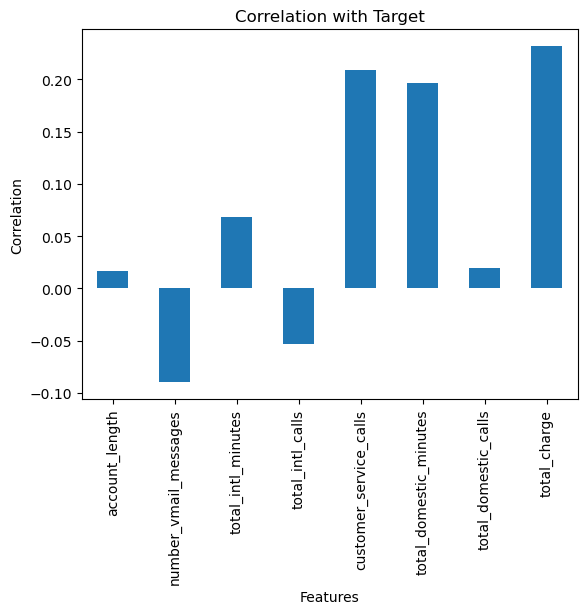

In [16]:
# Plotting the correlations
correlation_df.plot(kind='bar', legend=False)
plt.title('Correlation with Target')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.show()

#### Observations
 * Strongest Correlates: The features with the strongest correlations to churn are total_charge (0.231549), customer_service_calls (0.208750), and total_domestic_minutes (0.196457). These are more influential in predicting churn compared to others. *
Weak or Minimal Correlates: Features like account_length, number_vmail_messages, total_intl_minutes, total_intl_calls, and total_domestic_calls have weak correlations with churn, suggesting that they have less influence on whether a customer will churn.

In [17]:
# Categorical correlation
category = ['international_plan', 'voice_mail_plan']
cat_corr = {}
for col in category:
    correlation, _ = pointbiserialr(df[col], df['churn'])
    cat_corr[col] = correlation


correlation_df = pd.DataFrame.from_dict(cat_corr, orient='index', columns=['Correlation with Churn'])
print(correlation_df)

                    Correlation with Churn
international_plan                0.259852
voice_mail_plan                  -0.102148


#### Observations:
* International_plan: Customers with an international plan are more likely to churn, indicating a potential need to investigate and address factors contributing to churn among international plan subscribers.* Voice_mail_plan: Customers with avoicemaill plan are slightly less likely to churn, suggesting that voicemaill services may have a minor impact on reducing churn rates..

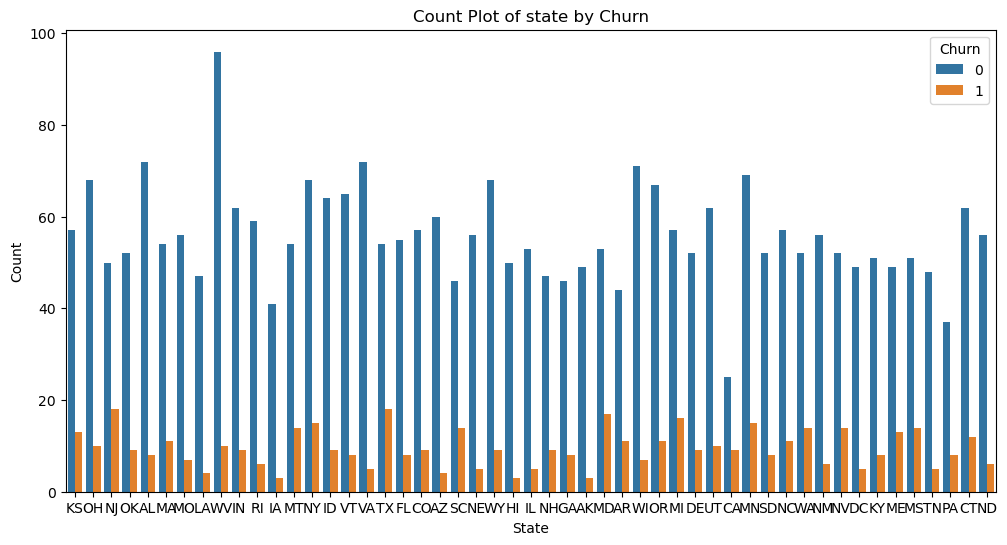

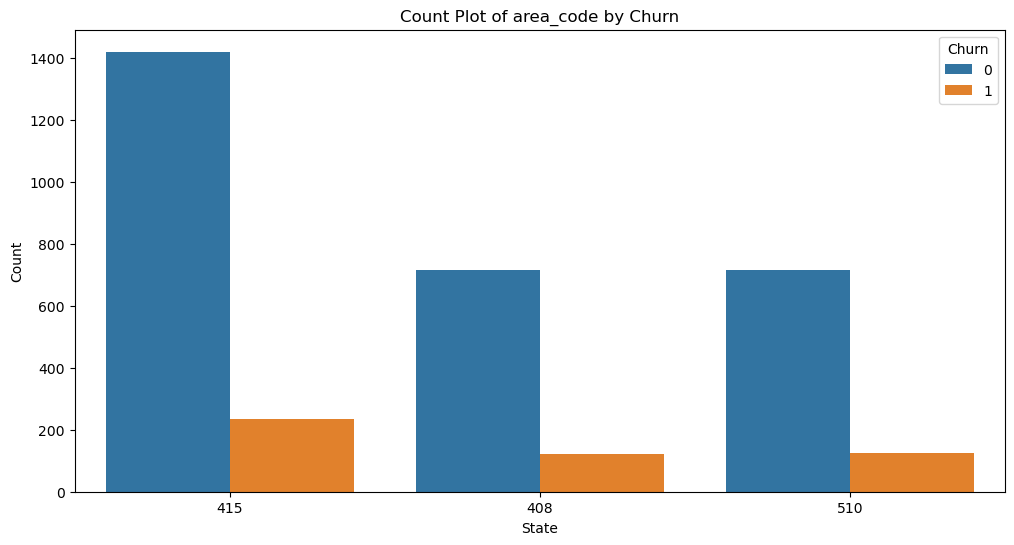

In [18]:
# Churn rate per state and area code (non_binary categories)
non_binary_category = ['state','area_code']
# Countplot
for cat in non_binary_category:
    plt.figure(figsize=(12, 6))
    temp_df = df.copy()  # Create a copy of the DataFrame to ensure type conversion does not affect original dataset and bypass warnings. 
    temp_df[cat] = temp_df[cat].astype(str)
    temp_df['churn'] = temp_df['churn'].astype(str)
    sns.countplot(x=cat, hue='churn', data=temp_df)
    plt.title(f'Count Plot of {cat} by Churn')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show();


#### Observation:
* Area Code and State don't seem to have an effect on whether customers churn. They may be redundant columns.

* Plotting the features with an interesting correlation against churn.

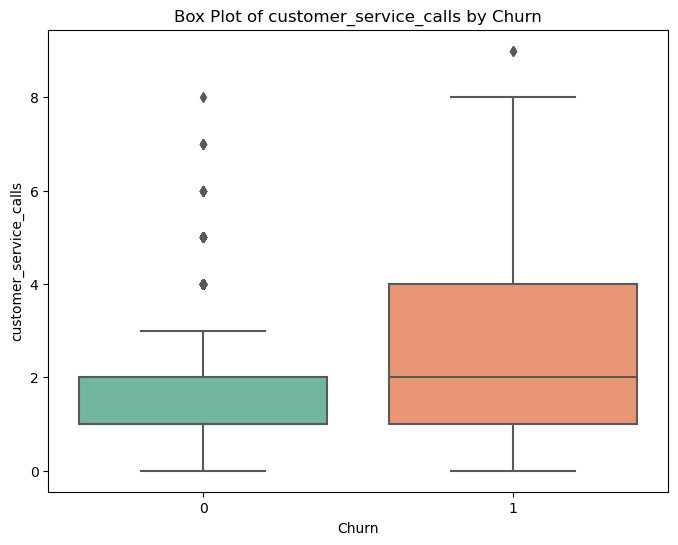

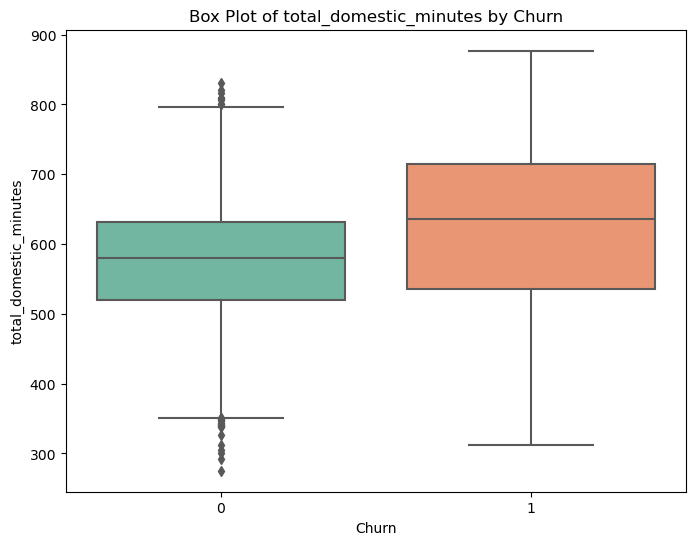

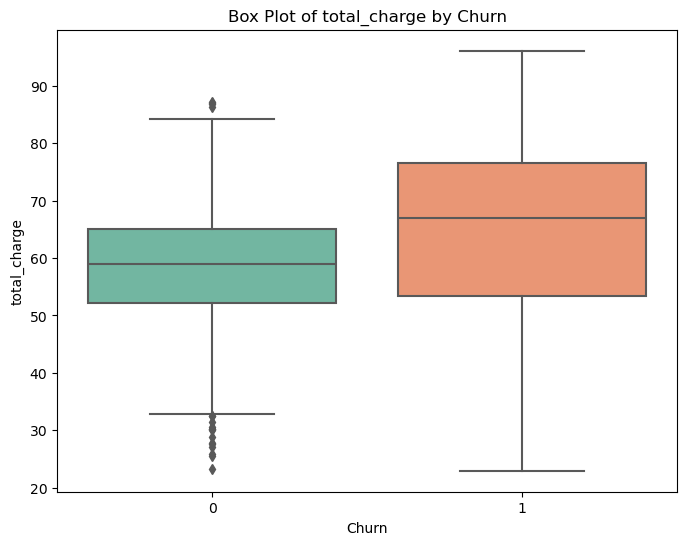

In [19]:
# List of interesting numerical features
num_features = ['customer_service_calls', 'total_domestic_minutes', 'total_charge']

# Creating box plots for the features
for feature in num_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='churn', y=feature, data=df, palette='Set2')
    plt.title(f'Box Plot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

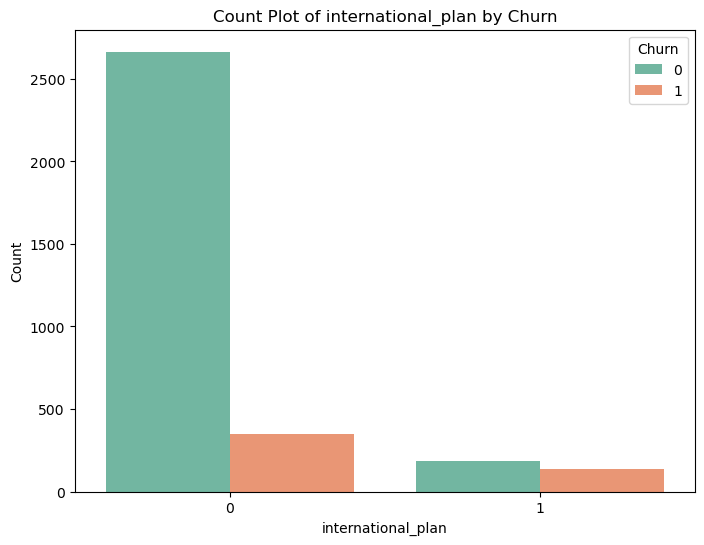

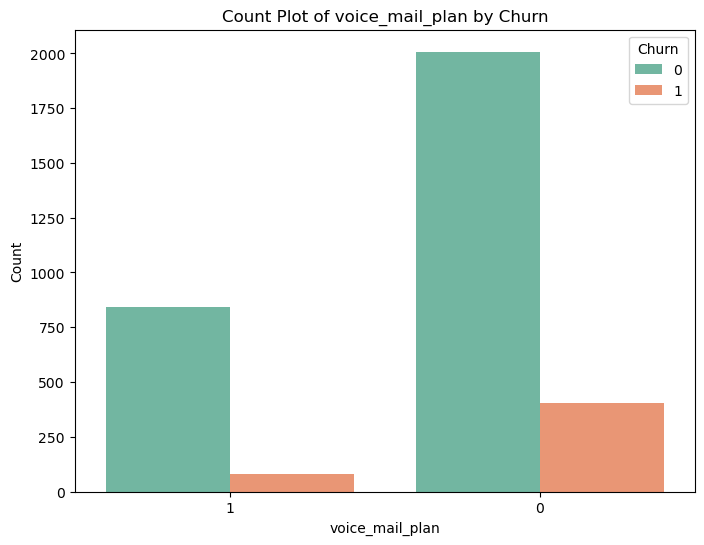

In [20]:
# List of interesting binary categorical features
cat_features = ['international_plan', 'voice_mail_plan']

# Create count plots for categorical features
for feature in cat_features:
    plt.figure(figsize=(8, 6))
    temp_df = df.copy()  # Create a copy of the DataFrame to ensure type conversion does not affect original dataset. 
    temp_df[feature] = temp_df[feature].astype(str)
    temp_df['churn'] = temp_df['churn'].astype(str)
    sns.countplot(x=feature, hue='churn', data=temp_df, palette='Set2')
    plt.title(f'Count Plot of {feature} by Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.show()


#### Percentages.

Churn percentages for feature 'international_plan':
   international_plan churn  percentage
0                   0     0   88.504983
1                   1     0   57.585139
2                   0     1   11.495017
3                   1     1   42.414861




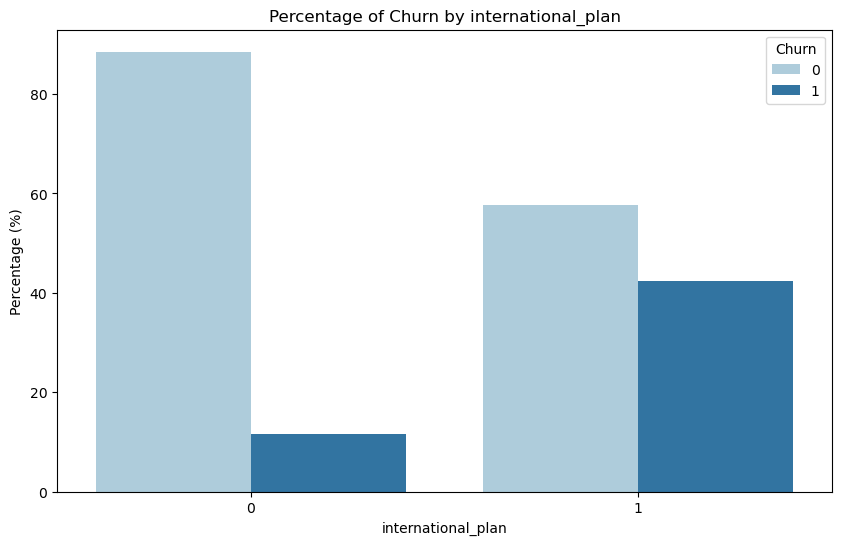

Churn percentages for feature 'voice_mail_plan':
   voice_mail_plan churn  percentage
0                0     0   83.284944
1                1     0   91.323210
2                0     1   16.715056
3                1     1    8.676790




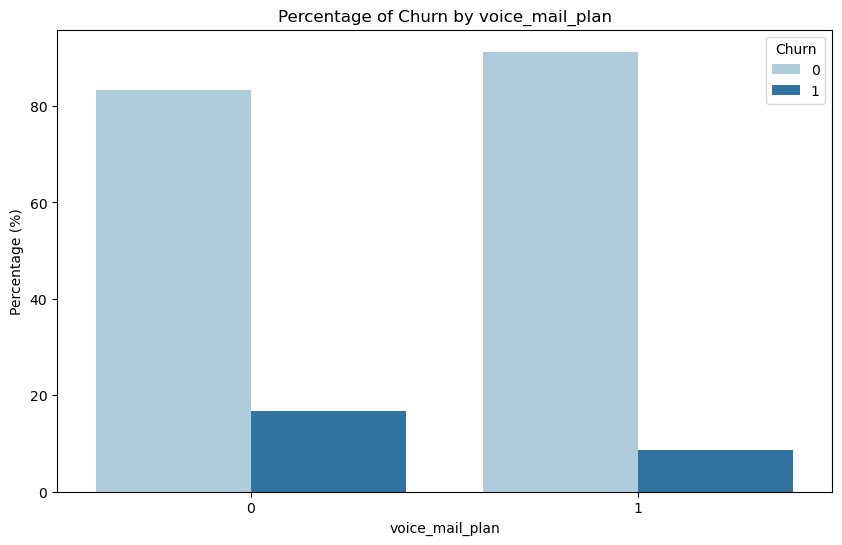

In [21]:
# Function to calculate and plot percentage of churn
def plot_churn_percentage(df, feature):
    # Convert churn to string to avoid issues with seaborn
    df_temp = df.copy()
    df_temp['churn'] = df_temp['churn'].astype(str)
    
    churn_counts = df_temp.groupby([feature, 'churn']).size().unstack().fillna(0)
    churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

    churn_percentage = churn_percentage.reset_index()
    churn_percentage = churn_percentage.melt(id_vars=feature, value_vars=churn_percentage.columns[1:], var_name='churn', value_name='percentage')
    # Print the churn percentages
    print(f"Churn percentages for feature '{feature}':")
    print(churn_percentage)
    print("\n")
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='percentage', hue='churn', data=churn_percentage, palette='Paired')
    plt.title(f'Percentage of Churn by {feature}')
    plt.ylabel('Percentage (%)')
    plt.xlabel(feature)
    plt.legend(title='Churn', loc='upper right')
    plt.show()

# Plot churn percentage for each categorical feature
for feature in cat_features:
    plot_churn_percentage(df, feature)

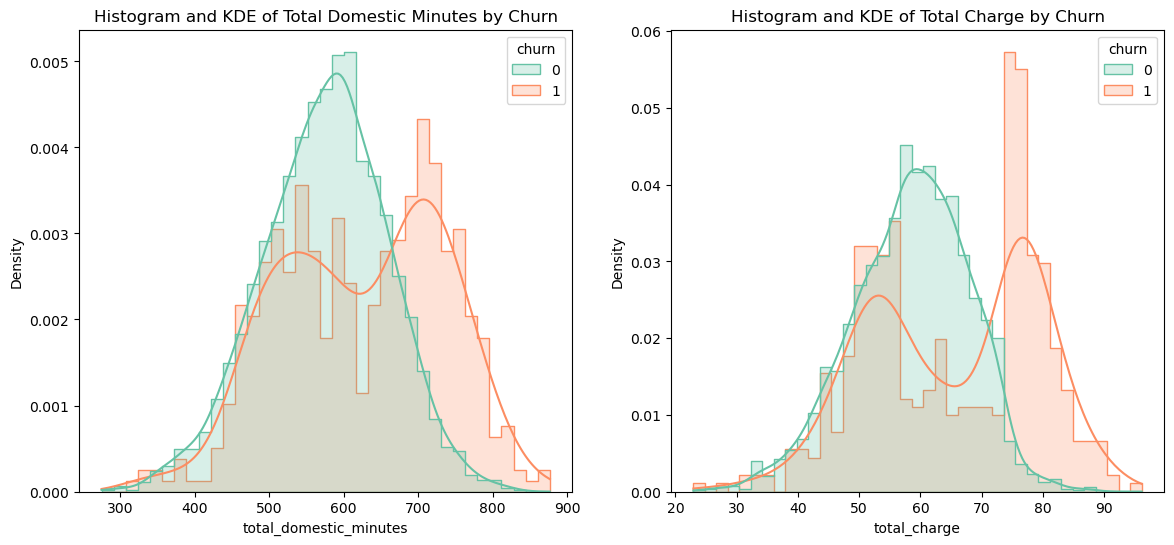

In [22]:
plt.figure(figsize=(14, 6))

# Histogram and KDE plot for total_domestic_minutes
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_domestic_minutes', hue='churn', kde=True, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Histogram and KDE of Total Domestic Minutes by Churn')

# Histogram and KDE plot for total_charge
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_charge', hue='churn', kde=True, palette='Set2', element='step', stat='density', common_norm=False)
plt.title('Histogram and KDE of Total Charge by Churn')

plt.show()


#### Observations:
* Almost half of customers with an international plan tend to churn. May be due to high international call rates or poor service.
* Customers with a voicemail plan have approximately double the chance of remaining a SyriaTel subscriber.
* More customer service calls transcend to a higher churn rate, this may due to customer dissatisfaction.
* More minutes also has a positive correlation with churning. This may due to higher charges or subpar service delivery.
* Higher charges also lead to potential churns, this seems obvious as customers are always looking for cheaper alternatives and value for money.

### Handling Outliers ###

In [23]:
print("Before dropping numerical outliers, length of the dataframe is: ", len(df))

def drop_numerical_outliers(df, z_thresh=3):
    # Select only the numeric columns excluding:
    # 'international_plan'. This is excluded as all those with international plans will be treated as outliers
    # 'churn' as it is the target variable
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = numeric_cols.drop(['international_plan','churn'], errors='ignore')  #Churn actually has no outliers.

    # Apply Z-score filter to the selected columns
    constrains = df[numeric_cols].apply(lambda x: np.abs(stats.zscore(x)) < z_thresh).all(axis=1)
    
    # Drop the rows that do not satisfy the constraints
    df.drop(df.index[~constrains], inplace=True)

drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ", len(df))


Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3199


* Comparing correlations to see change. 

In [24]:
# Numeric Correlations
correlations = {}
for col in numeric_cols:
    correlation, _ = pointbiserialr(df[col], df['churn'])
    correlations[col] = correlation


correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation with Churn'])
print(correlation_df)

for col in category:
    correlation, _ = pointbiserialr(df[col], df['churn'])
    cat_corr[col] = correlation


correlation_df = pd.DataFrame.from_dict(cat_corr, orient='index', columns=['Correlation with Churn'])
print(correlation_df)

                        Correlation with Churn
account_length                        0.018051
number_vmail_messages                -0.095066
total_intl_minutes                    0.069206
total_intl_calls                     -0.066444
customer_service_calls                0.173174
total_domestic_minutes                0.208260
total_domestic_calls                  0.020548
total_charge                          0.247229
                    Correlation with Churn
international_plan                0.264218
voice_mail_plan                  -0.106861


* Not much change as only 4% of data was dropped.

* Dropping extra columns

In [25]:
# 'state' One hot encoding would result in a lot of columns to a column with low correlation.
# 'account_length' has low correlation, no unit of measure and customer behaviour is more predictive of churn.
df = df.drop(columns=['state', 'account_length'])

### Modeling.

In [26]:
# Features and target
X = df.drop(columns=['churn'])
y = df['churn']

# Categorical and numeric features
categorical_features = ['area_code', 'international_plan', 'voice_mail_plan']
numeric_features = ['number_vmail_messages', 'total_intl_minutes',
                    'total_intl_calls', 'customer_service_calls', 
                    'total_domestic_minutes', 'total_domestic_calls', 
                    'total_charge']

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Verify the shape of the transformed data
print(X_train.shape)
print(X_test.shape)

# Optional: Check the first few rows of the transformed training data
print(pd.DataFrame(X_train).head())

(2559, 11)
(640, 11)
         0         1         2         3         4         5         6    7   \
0  1.347334  0.425708  1.221516  0.401515 -0.477062  0.195622 -0.860626  1.0   
1  1.570442 -0.092660  0.756289 -1.243764 -0.377500 -0.269320 -0.933997  1.0   
2 -0.586264  1.166233  0.756289 -0.421125  0.609060  0.980212  0.339724  0.0   
3  1.644811 -1.314526  0.756289 -0.421125 -0.127466 -1.112027 -0.825408  0.0   
4  1.867918 -0.981290  0.756289 -0.421125 -0.506477  1.590448 -0.799973  0.0   

    8    9    10  
0  0.0  0.0  1.0  
1  0.0  0.0  1.0  
2  0.0  0.0  0.0  
3  0.0  0.0  1.0  
4  1.0  0.0  1.0  


* Tackling class imbalance

In [27]:
# Using SMOTE to tackle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [28]:
# Logistic Regression Pipeline
log_reg_pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Hyperparameter tuning
param_grid_log_reg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100, 1e12]
}

cv_log_reg = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, cv=cv_log_reg, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(X_train_res, y_train_res)

# Best parameters and score
best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_

print("Logistic Regression Best Params:", best_params_log_reg)
print("Logistic Regression Best Cross-Validation Score:", best_score_log_reg)


Logistic Regression Best Params: {'classifier__C': 100}
Logistic Regression Best Cross-Validation Score: 0.7645241827340092


## Random Forest Classifier

In [29]:
# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

cv_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=cv_rf, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train_res, y_train_res)

# Best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Random Forest Best Params:", best_params_rf)
print("Random Forest Best Cross-Validation Score:", best_score_rf)


Random Forest Best Params: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Random Forest Best Cross-Validation Score: 0.9734601218466954


## Gradient Boosting Classifier

In [30]:
# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Hyperparameter tuning
param_grid_gb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

cv_gb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=cv_gb, scoring='accuracy')

# Fit the model
grid_search_gb.fit(X_train_res, y_train_res)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Gradient Boosting Best Params:", best_params_gb)
print("Gradient Boosting Best Cross-Validation Score:", best_score_gb)


Gradient Boosting Best Params: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Gradient Boosting Best Cross-Validation Score: 0.9786770856658971


### Model Evaluation:

In [31]:
# Logistic Regression Evaluation
y_pred_log_reg = grid_search_log_reg.best_estimator_.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Random Forest Evaluation
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Evaluation
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Logistic Regression Test Accuracy: 0.771875
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       551
           1       0.36      0.80      0.49        89

    accuracy                           0.77       640
   macro avg       0.66      0.78      0.67       640
weighted avg       0.88      0.77      0.80       640

Random Forest Test Accuracy: 0.98125
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       551
           1       0.99      0.88      0.93        89

    accuracy                           0.98       640
   macro avg       0.98      0.94      0.96       640
weighted avg       0.98      0.98      0.98       640

Gradient Boosting Test Accuracy: 0.978125
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       551
           1       0.96      0.88      0.92        89

    accuracy                           0.98       640
   ma

In [32]:
# The logistic regression model with the best parameters
logistic_regression_clf = LogisticRegression(**{'C': 10}, random_state=42, max_iter=1000)

# The random forest model with the best parameters
random_forest_clf = RandomForestClassifier(**{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}, random_state=42)

# The gradient boosting model with the best parameters
gradient_boosting_clf = GradientBoostingClassifier(**{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}, random_state=42)

# Model list
models=[logistic_regression_clf, random_forest_clf, gradient_boosting_clf]

# Fitting each model with its best parameters
logistic_regression_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
gradient_boosting_clf.fit(X_train, y_train)


# ROC-AUC score for each model
roc_auc_scores = [roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) for model in models]

# F1 score for each model
f1_scores = [f1_score(y_test, model.predict(X_test)) for model in models]

# precision for each model
precision_scores = [precision_score(y_test, model.predict(X_test)) for model in models]

# recall for each model
recall_scores = [recall_score(y_test, model.predict(X_test)) for model in models]

# Display the evaluation metrics in a DataFrame
evaluation_metrics = pd.DataFrame({
    'Model': models,
    'ROC-AUC': roc_auc_scores,
    'F1 Score': f1_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
})

print("Evaluation Metrics:")
evaluation_metrics


Evaluation Metrics:


,Model,ROC-AUC,F1 Score,Precision,Recall
0,"LogisticRegression(C=10, max_iter=1000, random...",0.845327,0.415385,0.658537,0.303371
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.931524,0.934132,1.000000,0.876404
2,([DecisionTreeRegressor(criterion='friedman_ms...,0.933114,0.928571,0.987342,0.876404


### ROC Curves

AUC for Logistic Regression: 0.845327188564204
AUC for Random Forest: 0.9315238891494525
AUC for Gradient Boosting: 0.9331144599196558


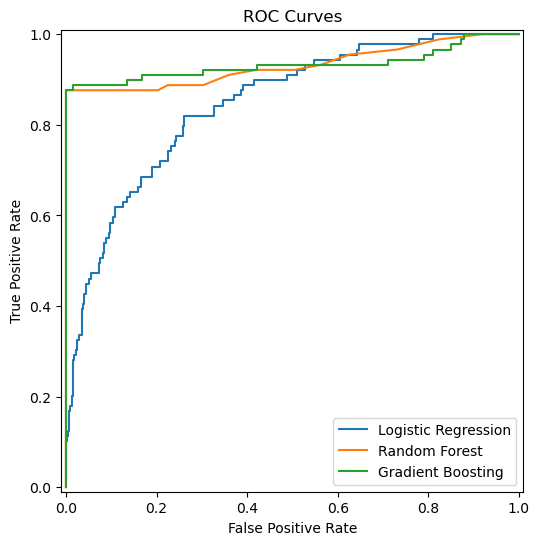

In [33]:
# Trained models logistic_regression_clf, random_forest_clf, and gradient_boosting_clf
models = [logistic_regression_clf, random_forest_clf, gradient_boosting_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
auc_scores = []
plt.figure(figsize=(8, 6))

for model, name in zip(models, model_names):
    # Probabilities of the positive class
    probas = model.predict_proba(X_test)[:, 1]
    # FPR and TPR
    fpr, tpr, _ = roc_curve(y_test, probas)
    # AUC Score
    auc_score = auc(fpr, tpr)
    auc_scores.append(auc_score)
    # Print AUCs
    print(f"AUC for {name}: {auc_score}")
    # RocCurveDisplay object
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name)
    # Plot the ROC curve
    roc_display.plot(ax=plt.gca())

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

plt.show()


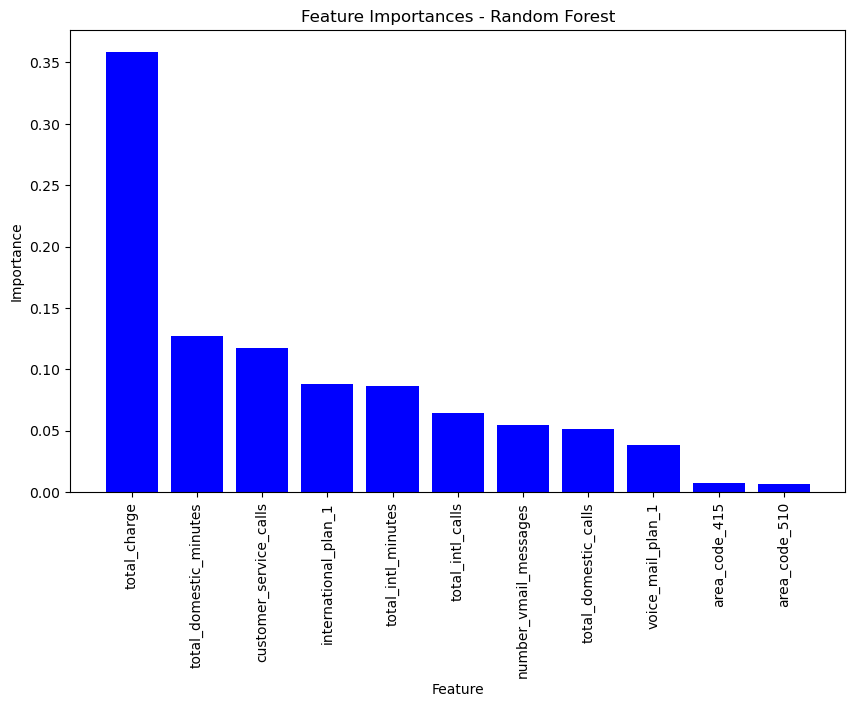

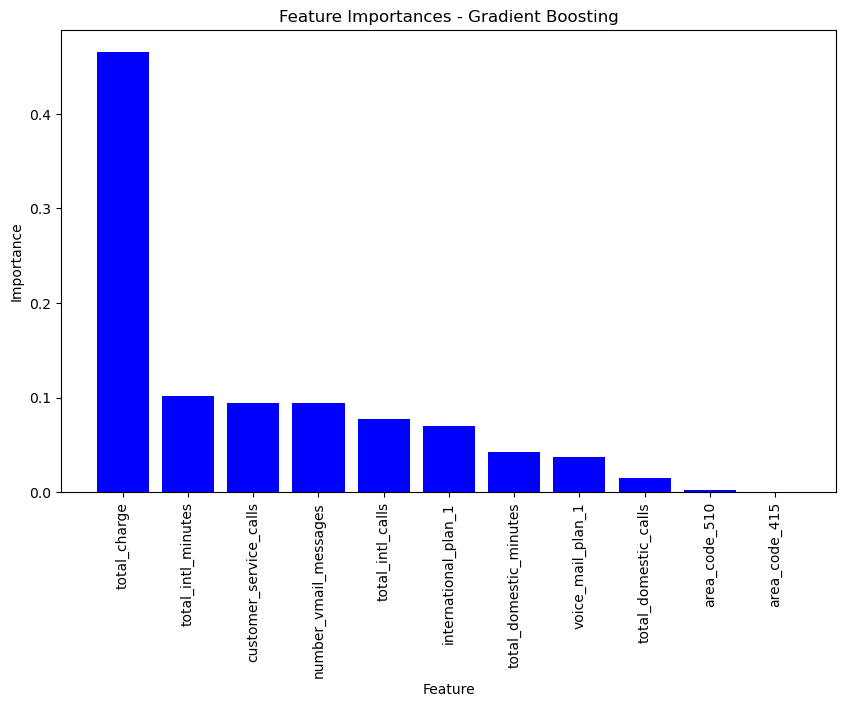

In [34]:
feature_names = ['number_vmail_messages', 'total_intl_minutes', 'total_intl_calls',
       'customer_service_calls', 'total_domestic_minutes',
       'total_domestic_calls', 'total_charge', 'area_code_415',
       'area_code_510', 'international_plan_1', 'voice_mail_plan_1']

# List of models and their names
models = [random_forest_clf, gradient_boosting_clf]
model_names = ['Random Forest', 'Gradient Boosting']

# Plotting feature importances for each model
for model, name in zip(models, model_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
    plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.title(f"Feature Importances - {name}")
    plt.xlabel("Feature")
    plt.ylabel("Importance")
    plt.show()


### Modelling Observations:
 

### Observations on Model Performance Metrics

**ROC-AUC:**
- **Logistic Regression:** The ROC-AUC score is 0.845, indicating a reasonably good ability to discriminate between the classes.
- **Random Forest:** The ROC-AUC score is 0.932, demonstrating a very high ability to distinguish between churn and non-churn customers.
- **Gradient Boosting:** The ROC-AUC score is 0.933, indicating an excellent ability to differentiate between classes, similar to Random Forest.

**F1 Score:**
- **Logistic Regression:** The F1 score is 0.415, relatively low, indicating poor balance between precision and recall.
- **Random Forest:** The F1 score is 0.934, very high, suggesting an excellent balance between precision and recall.
- **Gradient Boosting:** The F1 score is 0.929, also very high, showing a strong balance between precision and recall.

**Precision:**
- **Logistic Regression:** Precision is 0.659, meaning correct predictions about churn 66% of the time.
- **Random Forest:** Precision is 1.000, indicating perfect correctness in churn predictions.
- **Gradient Boosting:** Precision is 0.987, also very high, indicating strong correctness in churn predictions.

**Recall:**
- **Logistic Regression:** Recall is 0.303, showing the model identifies only 30% of actual churn cases.
- **Random Forest:** Recall is 0.876, correctly identifying around 88% of actual churn cases.
- **Gradient Boosting:** Recall is 0.876, same as Random Forest, showing a strong abilit#y to dete churn cases.

### Cro**Logistic Regression:**
- **Best Params:** `{'classifier__C': 100}`
- **Best Cross-Validation Score:** 0.764
- **Test Accuracy:** 0.772
- **Test Metrics:**
  - **Precision:** 0.36 for churn class
  - **Recall:** 0.80 for churn class
  - **F1-Score:** 0.49 for churn class
  - The model shows a significant drop in performance on the test set, especially in precision and recall for the churn class, indicating potential issues with generalization.dicating potential issues with generalization.

**Random Forest:**
- **Best Params:** `{'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}`
- **Best Cross-Validation Score:** 0.973
- **Test Accuracy:** 0.981
- **Test Metrics:**
  - **Precision:** 0.99 for churn class
  - **Recall:** 0.88 for churn class
  - **F1-Score:** 0.93 for churn class
  - The model performs exceptionally well on the test set, maintaining high precision and recall, indicating good generalization.

**Gradient Boosting:**
- **Best Params:** `{'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}`
- **Best Cross-Validation Score:** 0.979
- **Test Accuracy:** 0.978
- **Test Metrics:**
  - **Precision:** 0.96 for churn class
  - **Recall:** 0.88 for churn class
  - **F1-Score:** 0.92 for churn class
  - The model performs very well, with high precision and recall, indic#ating good generalization similar to the Random Forest model.

### Summary

- **Logistic Regression** shows lower performance in all metrics compared to the other models, indicating it might not be the best choice for this dataset.
- **Random Forest** and **Gradient Boosting** both show excellent performance, with Random Forest having a slight edge in ROC-AUC and precision. Both models generalize well to the

**Feature Importance**

- **Total Charge** is the most crucial feature in both models, indicating that higher charges are strongly associated with churn.
- **Customer Service Calls** is another consistently important feature, suggesting that frequent interaction with customer service might be a red flag for churn.
- **International Features** like total international minutes and having an international plan also play significant roles.
- **Area Codes** have minimal impact on predicting churn in both models, suggesting that geographic location (as indicated by area codes) is not a significant factor.

**Model Differences:**

- **Gradient Boosting** gives more importance to total international minutes and the number of voicemail messages compared to the Random Forest model.
- **Random Forest** places slightly more emphasis on total domestic minutes compared to Gradient Boosting.es slightly more emphasis on total domestic minutes compared to Gradient Boosting.
sting.